In [1]:
import sys
sys.path.append('./')

from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools   #* 用于进行解释变量名称的遍历。
import sys
import seaborn as sns
import statsmodels.formula.api as smf
from  statsmodels.api import ProbPlot
from scipy.stats import norm


#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

df = pd.read_excel("data/merge_shop_coupon_nm.xls" , index_col = 0)
print(df.columns)
print(DS.DataLabeling(df))
columns = ['关键词', '城市', '评分', '评价数', '人均' , '团购价', '购买人数']
data = df[columns]
data.head(10)

Index(['店名', '关键词', '城市', '评分', '评价数', '人均', '地址', '营业时间', '菜名', '团购价',
       '购买人数'],
      dtype='object')
[0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0]


,关键词,城市,评分,评价数,人均,团购价,购买人数
0,火锅,xa,4.4,877,45.5,118.5,1692
1,火锅,xa,4.6,2253,100.0,88.0,19584
2,火锅,xa,4.5,1398,56.0,52.0,11798
3,火锅,xa,4.4,48,63.0,59.9,40
4,火锅,xa,4.3,214,84.0,59.5,1282
5,火锅,xa,4.7,618,70.0,169.0,1393
6,火锅,xa,4.5,393,70.5,128.0,158
7,火锅,xa,4.7,2534,77.0,85.0,3038
8,火锅,xa,4.3,208,74.0,184.0,180
9,火锅,xa,4.4,211,50.0,78.0,411


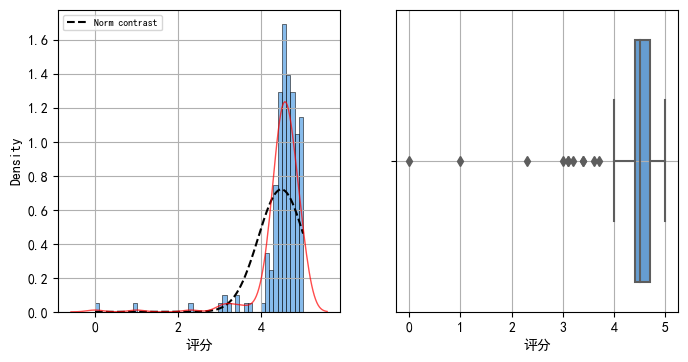

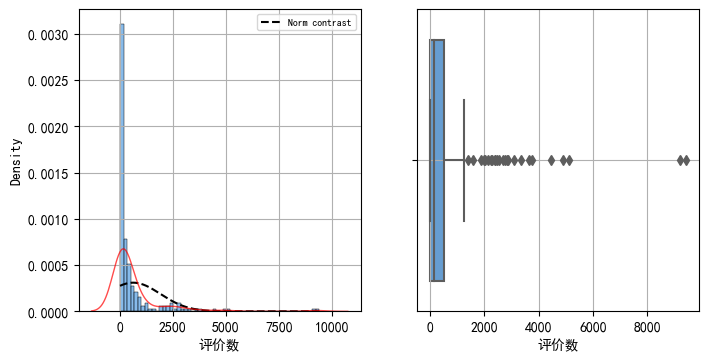

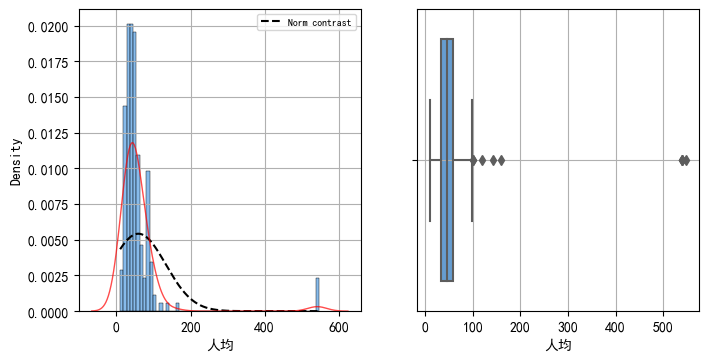

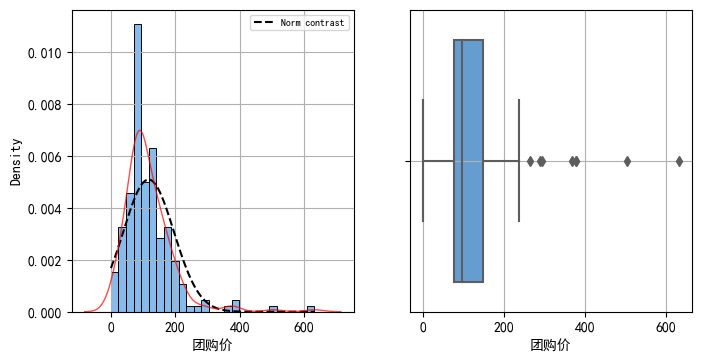

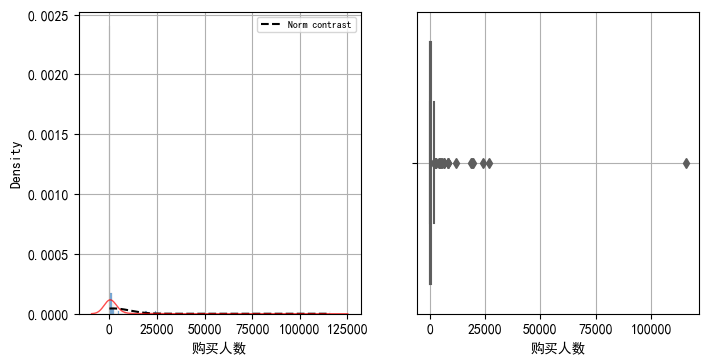

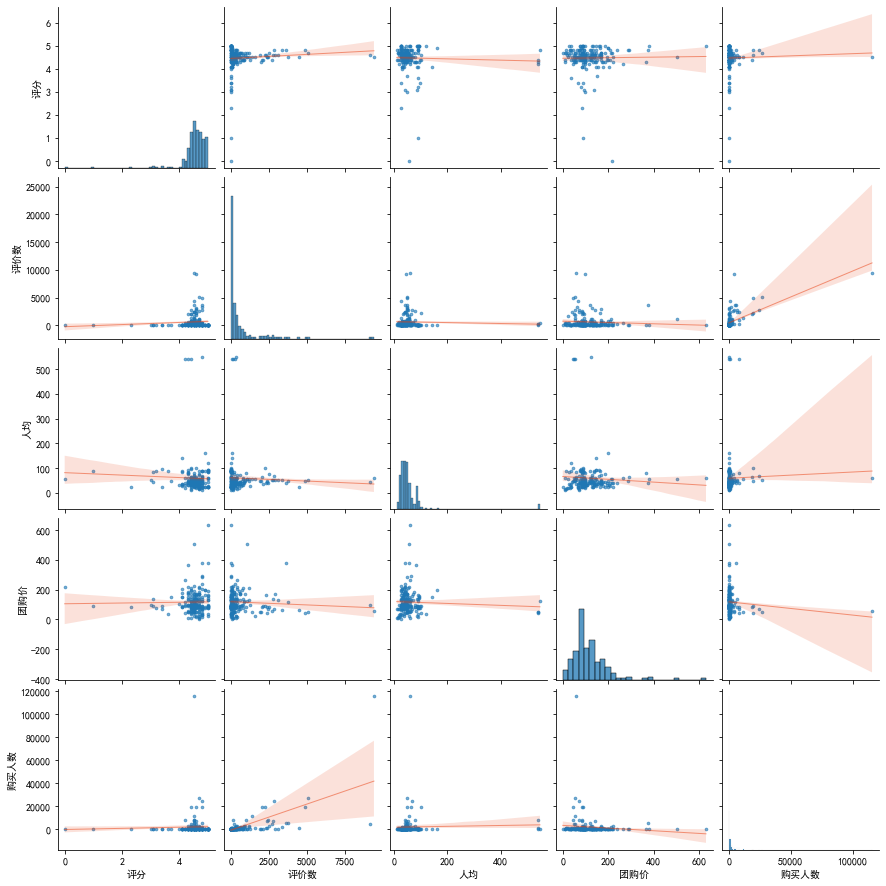

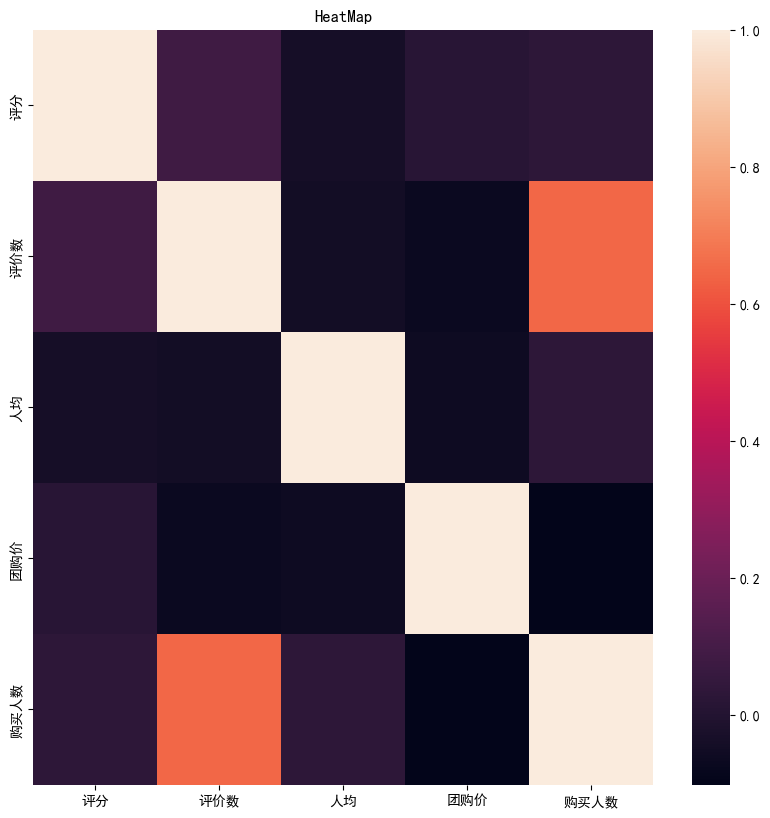

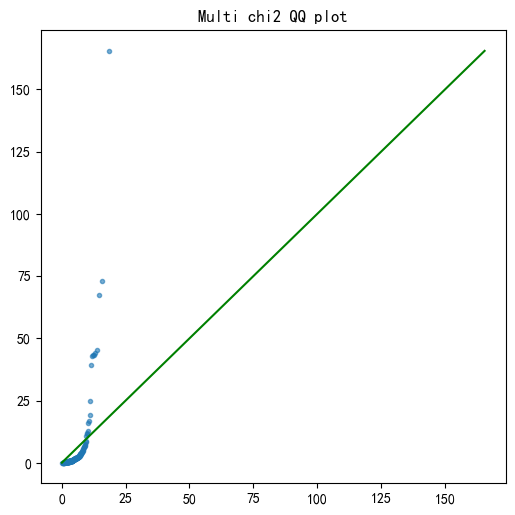

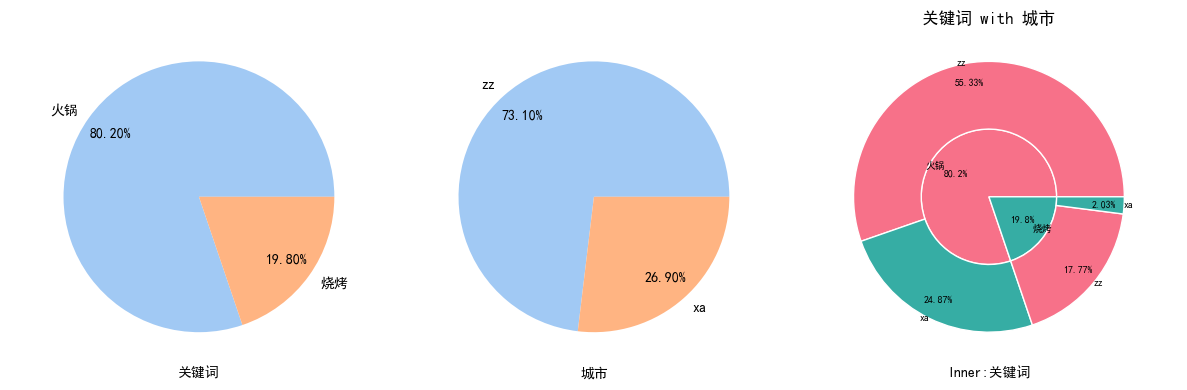

In [4]:
DS.Auto_plt(data[['关键词', '城市', '评分' , '评价数', '人均' , '团购价', '购买人数']] , dataclass=[1, 1, 0, 0, 0, 0, 0])